# Project 1

## Peder Brekke, Simen Nesland and Espen Bjørge Urheim

### TASK 1)

In [108]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import scipy as sp
sns.set()

newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
from matplotlib import cm
plt.rcParams.update(newparams)

import sys
np.set_printoptions(threshold=sys.maxsize)

### a)

In [109]:
def anistropic_heat(g, f, M, a):
    # Parameters
    h = 1/M

    # Create the A_h-matrix
    B = np.diag(np.ones((M-1)**2)*(2+2*a))
    C_diag = np.ones((M-1)**2-1)*(-a)
    C_diag[M-2::M-1] = 0
    C = np.diag(C_diag, -1)
    D_diag = np.ones((M-1)**2-M)*(-1)
    D_diag[M-2::M-1] = 0
    D = np.diag(D_diag, M)
    A_h = B + C + C.T + D + D.T

    # Boundary contributions
    gn = np.zeros((M-1)**2)
    n = 0
    for i in range(1, M): # Iterate over gridpoints in y-direction
        for j in range(1, M): # Iterate over gridpoints in x-direction
            if j == 1:   # Left boundary
                gn[n] += g(0, 2*h*i) + g(0, 2*h*(i-1))

            if j == M-1: # Right boundary
                gn[n] += g(1, 2*h*i) + g(1, 2*h*(i+1))

            if i == 1:   # Lower boundary
                if j != 1:
                    gn[n] += g(h*(j-1), 0)

            if i == M-1: # Upper boundary
                if j != M-1:
                    gn[n] += g(h*(j+1), 2)
            n += 1
            
    # Calculate grid, RHS and solution
    x = np.linspace(0, 1, M+1)
    y = np.linspace(0, 2, M+1)
    fn = f(x[1:-1],y[1:-1],a)
    U = np.linalg.solve(A_h, h**2*fn+gn)
    
    # Reshape U as a matrix, and flip rows to achieve correct ordering (i.e. U1 bottom left)
    #U = np.flip(U.reshape(M-1,M-1),0)
    U = U.reshape(M-1,M-1)

    # Add boundaries to U
    U = np.pad(U, (1,1))
    U[-1,:] = g(x, np.ones_like(y)*2)  # Upper boundary
    U[0,:] = g(x, np.zeros_like(y))  # Lower boundary
    U[:,0] = g(np.zeros_like(x), y)   # Left boundary
    U[:,-1] = g(np.ones_like(x), y)   # Right boundary

    return x, y, U

# Edited version to allow multiple functions as boundaries
def anistropic_heat2(gb,gl,gr,gt, f, M, a):
    # Parameters
    h = 1/M

    # Create the A_h-matrix
    B = np.diag(np.ones((M-1)**2)*(2+2*a))
    C_diag = np.ones((M-1)**2-1)*(-a)
    C_diag[M-2::M-1] = 0
    C = np.diag(C_diag, -1)
    D_diag = np.ones((M-1)**2-M)*(-1)
    D_diag[M-2::M-1] = 0
    D = np.diag(D_diag, M)
    A_h = B + C + C.T + D + D.T

    # Boundary contributions
    gn = np.zeros((M-1)**2)
    n = 0
    for i in range(1, M): # Iterate over gridpoints in y-direction
        for j in range(1, M): # Iterate over gridpoints in x-direction
            if j == 1:   # Left boundary
                gn[n] += gl(0, 2*h*i) + gl(0, 2*h*(i-1))

            if j == M-1: # Right boundary
                gn[n] += gr(1, 2*h*i) + gr(1, 2*h*(i+1))

            if i == 1:   # Lower boundary
                if j != 1:
                    gn[n] += gb(h*(j-1), 0)

            if i == M-1: # Upper boundary
                if j != M-1:
                    gn[n] += gt(h*(j+1), 2)
            n += 1
            
    # Calculate grid, RHS and solution
    x = np.linspace(0, 1, M+1)
    y = np.linspace(0, 2, M+1)
    fn = f(x[1:-1],y[1:-1],a)
    U = np.linalg.solve(A_h, h**2*fn+gn)
    
    # Reshape U as a matrix, and flip rows to achieve correct ordering (i.e. U1 bottom left)
    #U = np.flip(U.reshape(M-1,M-1),0)
    U = U.reshape(M-1,M-1)

    # Add boundaries to U
    U = np.pad(U, (1,1))
    U[-1,:] = gt(x, np.ones_like(y)*2)  # Upper boundary
    U[0,:] = gb(x, np.zeros_like(y))  # Lower boundary
    U[:,0] = gl(np.zeros_like(x), y)   # Left boundary
    U[:,-1] = gr(np.ones_like(x), y)   # Right boundary

    return x, y, U

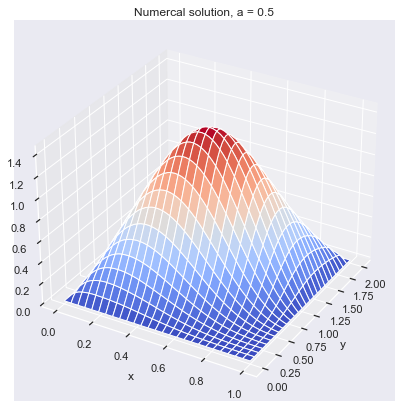

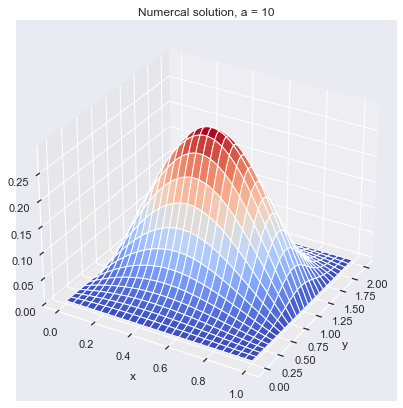

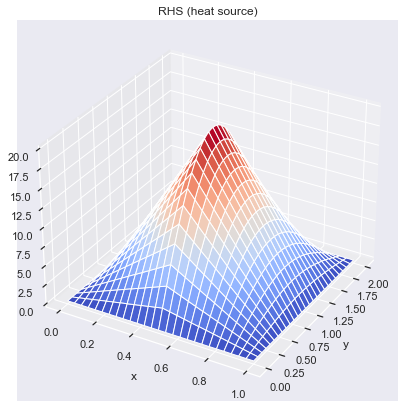

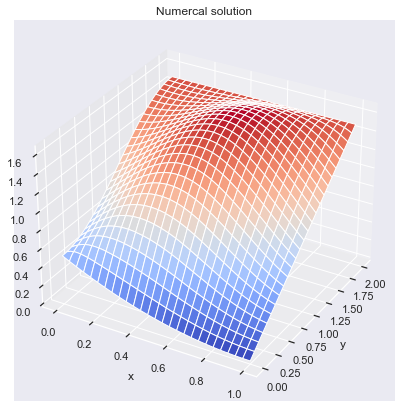

In [110]:
# PLOTS IN a)
def gb(x,y):
    return 0

def gl(x,y):
    return 0

def gr(x,y):
    return 0

def gt(x,y):
    return 0


def f_test(x,y,a):
    xv, yv = np.meshgrid(x,y)
    fn = 50*np.exp(-10*(xv-0.5)**2)*np.exp(-10*(yv-1)**2)
    return fn.reshape((len(x)**2))

a = 0.5
M = 52
x, y, U = anistropic_heat2(gb,gl,gr,gt, f_test, M, a)
x = np.linspace(0,1,M+1)
y = np.linspace(0,2,M+1)
plot_solution(x, y, U, txt=f"Numercal solution, a = {a}", save=f"1a_a{a}.png")

a = 10
M = 52
x, y, U = anistropic_heat2(gb,gl,gr,gt, f_test, M, a)
x = np.linspace(0,1,M+1)
y = np.linspace(0,2,M+1)
plot_solution(x, y, U, txt=f"Numercal solution, a = {a}", save=f"1a_a{a}.png")

def gb(x,y):
    return 0.5*(x-1)**2

def gl(x,y):
    return -0.5*np.cos(y*np.pi/2)+1

def gr(x,y):
    return 0.75*y

def gt(x,y):
    return 1.5

def f_test(x, y, a):
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(len(x)):
        for j in range(len(y)):
            if 0 <= x[i] < 0.5:
                Z[j,i] = 20*2*x[i] * np.sin(np.pi/2 * y[j])
            elif 0.5 <= x[i] < 1:
                Z[j,i] = 20*(2-2*x[i]) * np.sin(np.pi/2 * y[j])
            else:
                Z[j,i] = 0
    return Z.reshape(len(x)**2)

a = 1
M = 52
x, y, U = anistropic_heat2(gb,gl,gr,gt, f_test, M, a)
x = np.linspace(0,1,M+1)
y = np.linspace(0,2,M+1)
plot_solution(x,y,f_test(x,y,a).reshape((len(x),len(x))), txt="RHS (heat source)", save="RHS_extra.png")
plot_solution(x, y, U, txt=f"Numercal solution", save="1a_extra.png")

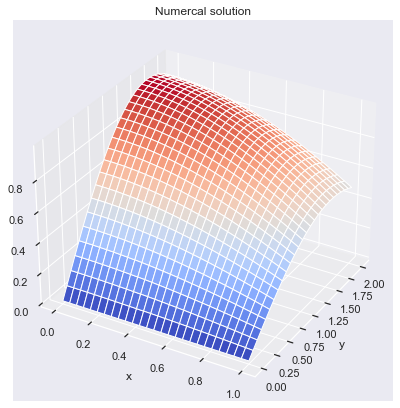

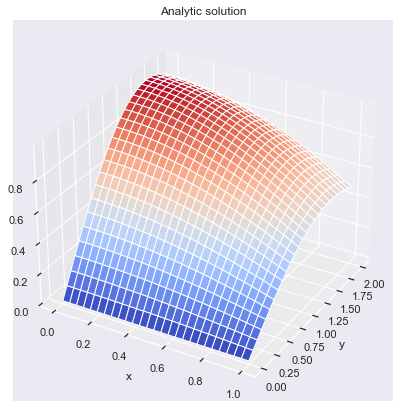

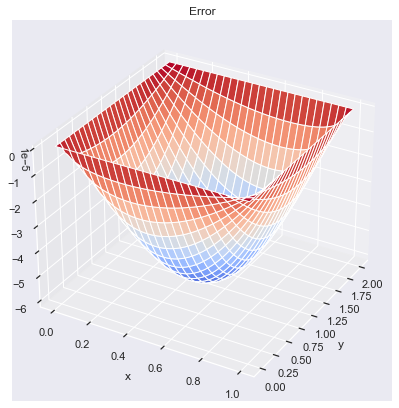

In [111]:
# c) plots
a=1

def uex1(x,y):
    xv, yv = np.meshgrid(x,y)
    yv = np.flip(yv,0)
    return 1/np.pi**2*np.sin(np.pi*xv)*np.sin(np.pi/2*yv)

def f1(x,y,a):
    xv, yv = np.meshgrid(x,y)
    fn = (a+2)*np.sin(np.pi*xv)*np.sin(np.pi/2*yv)-2*np.cos(np.pi*xv)*np.cos(np.pi/2*yv)
    return fn.reshape((len(x)**2))

def uex2(x,y):
    xv, yv = np.meshgrid(x,y)
    return np.cos(xv)*np.sin(yv)

def g2(x,y):
    return np.cos(x)*np.sin(y)

def f2(x,y,a):
    xv, yv = np.meshgrid(x,y)
    fn = -(-2*2*np.cos(yv)*np.sin(xv) - np.cos(xv)*np.sin(yv)*(a + 1) - 2**2*np.cos(xv)*np.sin(yv))
    return fn.reshape((len(x)**2))

def uex3(x,y):
    xv, yv = np.meshgrid(x,y)
    #yv = np.flip(yv,0)
    return np.exp(1 / 2*yv)*(-xv + 1)**3

def g3(x,y):
    return np.exp(1 / 2*y)*(-x + 1)**3

def f3(x,y,a):
    xv, yv = np.meshgrid(x,y)
    fn = -(-3*2*np.exp(1 / 2*yv)*(-xv + 1)**2 + 6*np.exp(1 / 2*yv)*(a + 1)*(-xv + 1) + 1 / 4*2**2*np.exp(1 / 2*yv)*(-xv + 1)**3)
    return fn.reshape((len(x)**2))

def plot_solution(x, t, U, dim = (7,7), txt='Solution', save = False):
    # Plot the Black-Scholes equation (3d-plot)
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    fig.set_figheight(dim[0])
    fig.set_figwidth(dim[1])
    X, Y = np.meshgrid(x,y)
    ax.plot_surface(Y, X, U, cmap=cm.coolwarm)
    ax.view_init(azim=30)
    plt.xlabel('y')
    plt.ylabel('x')
    ax.zaxis.labelpad = -15
    ax.invert_xaxis()
    plt.title(txt)
    if save:
        plt.savefig(save)

M = 52
x, y, U = anistropic_heat(g2, f2, M, a)
x = np.linspace(0,1,M+1)
y = np.linspace(0,2,M+1)
u = uex2(x,y)

plot_solution(x, y, U, txt="Numercal solution", save="Numerical_smooth.png")
plot_solution(x, y, u, txt="Analytic solution", save="Analytic_smooth.png")
plot_solution(x, y, u-U, txt="Error", save="Error_smooth.png")

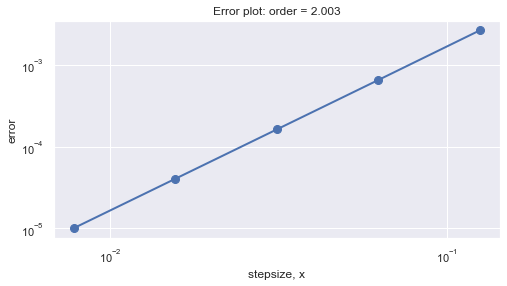

In [112]:
# c) convergence
def g_std(x,y):
    return 0

def convergence(u_exact, rhs, g=g_std, a = 1, M0 = 8, K_max = 5, solver=anistropic_heat):
    """
    Calculates errors for different values of M, i.e. different stepsizes.
    Returns array of stepsizes, errors and order of fitted curve in log-log.
    M0: number of intervals for first measurement
    K_max: number of times error will be measured (stepsize halved each time)
    """
    errs = np.zeros(K_max)
    hs = np.zeros(K_max)

    M = M0
    
    for l in range(K_max):  
        x, y, U = solver(g,rhs,M,a)

        hs[l] = 1/M
        errs[l] = np.linalg.norm(U.reshape(((M+1)**2,1)) - u_exact(x,y).reshape(((M+1)**2,1)), np.inf)
        
        M *= 2

    order = np.polyfit(np.log(hs),np.log(errs),1)[0]
    return hs, errs, round(order, 3)

H, E, order = convergence(uex2, f2, g2)
plt.loglog(H,E, 'o-')
plt.title(f"Error plot: order = {order}")
plt.xlabel("stepsize, x")
plt.ylabel("error")
#plt.savefig("Convergence_smooth.png")
plt.show()

In [113]:
# d)
def anistropic_heat_irrational_r(g, f, M, a, r):
    # Parameters
    h = 1/M
    k = np.abs(r)*h
    N = int(np.ceil(2/k)) # y = kN is now barely outside the grid

    # Create the A_h-matrix
    B = np.diag(np.ones((M-1)*(N-1))*(2+2*a))
    C_diag = np.ones((M-1)*(N-1)-1)*(-a)
    C_diag[M-2::M-1] = 0
    C = np.diag(C_diag, -1)
    D_diag = np.ones((M-1)*(N-1)-M)*(-1)
    D_diag[M-2::M-1] = 0
    D = np.diag(D_diag, M)
    A_h = B + C + C.T + D + D.T

    # Boundary contributions
    gn = np.zeros((M-1)*(N-1))
    n = 0
    for i in range(1, N): # Iterate over gridpoints in y-direction
        for j in range(1, M): # Iterate over gridpoints in x-direction
            if j == 1:   # Left boundary
                gn[n] += g(0, k*i) + g(0, k*(i-1))

            if j == M-1: # Right boundary
                gn[n] += g(1, k*i)
                if i != N-1: # Do not add if we are at the top boundary
                    gn[n] += g(1, k*(i+1))
            if i == 1:   # Lower boundary
                if j != 1:
                    gn[n] += g(h*(j-1), 0)

            if i == N-1: # Upper boundary
                gn[n] += g(h*(j+1), 2)
            n += 1
            
    # Calculate grid, RHS and solution
    x = np.linspace(0, 1, M+1)
    y = np.linspace(0, (N-1)*k, N)
    y = np.pad(y, (0,1)) # Add y = 2 as final gridpoint in y-direction
    y[-1] = 2
    fn = f(x[1:-1],y[1:-1],a,r)
    U = np.linalg.solve(A_h, h**2*fn+gn)
    
    # Reshape U as a matrix, and flip rows to achieve correct ordering (i.e. U1 bottom left)
    #U = np.flip(U.reshape(M-1,M-1),0)
    U = U.reshape(N-1,M-1)

    # Add boundaries to U
    U = np.pad(U, (1,1))
    U += g(x, y)

    return x, y, U

In [114]:
a = 1

def uex1(x,y):
    xv, yv = np.meshgrid(x,y)
    yv = np.flip(yv,0)
    return 1/np.pi**2*np.sin(np.pi*xv)*np.sin(np.pi/2*yv)

def f1(x,y,a):
    xv, yv = np.meshgrid(x,y)
    fn = (a+2)*np.sin(np.pi*xv)*np.sin(np.pi/2*yv)-2*np.cos(np.pi*xv)*np.cos(np.pi/2*yv)
    return fn.reshape((len(x)**2))

def uex2(x,y):
    xv, yv = np.meshgrid(x,y)
    return np.cos(xv)*np.sin(yv)

def g2(x,y):
    if np.isscalar(x) and np.isscalar(y):
        return np.cos(x)*np.sin(y)
    
    xv, yv = np.meshgrid(x,y)
    gn = np.cos(xv)*np.sin(yv)
    gn[1:-1, 1:-1] = np.zeros_like(gn[1:-1,1:-1])
    return gn

def f2(x,y,a,r):
    xv, yv = np.meshgrid(x,y)
    fn = -(-2*r*np.cos(yv)*np.sin(xv) - np.cos(xv)*np.sin(yv)*(a + 1) - r**2*np.cos(xv)*np.sin(yv))
    return fn.flatten()

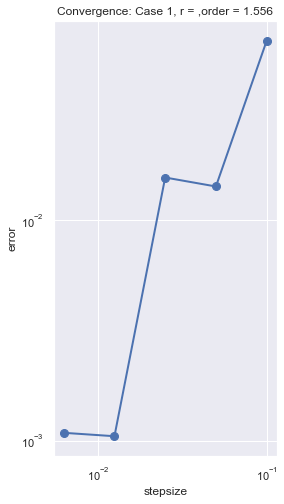

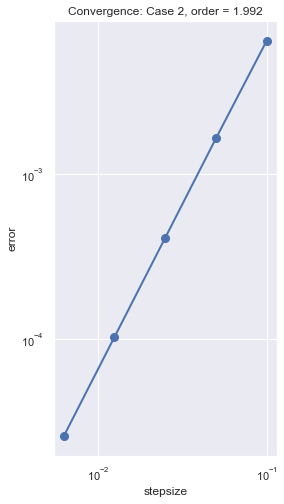

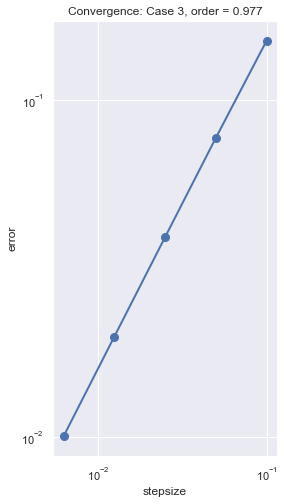

In [115]:
def convergence_1d(u_exact, rhs, g=g2, a = 1, M0 = 4, K_max = 5, r = np.pi, solver=anistropic_heat_irrational_r):
    """
    Calculates errors for different values of M, i.e. different stepsizes.
    Returns array of stepsizes, errors and order of fitted curve in log-log.
    M0: number of intervals for first measurement
    K_max: number of times error will be measured (stepsize halved each time)
    """
    errs = np.zeros(K_max)
    hs = np.zeros(K_max)

    M = M0
    
    for l in range(K_max):  
        x, y, U = solver(g,rhs,M,a,r)

        hs[l] = 1/M
        errs[l] = np.linalg.norm(U.flatten() - u_exact(x,y).flatten(), np.inf)
        
        M *= 2

    order = np.polyfit(np.log(hs),np.log(errs),1)[0]
    return hs, errs, round(order, 3)

def g_std(x,y):
    return 0

# CONVERGENCE PLOTS IN TASK d)
M = 10
K = 5

# "Random" r
r = np.pi
H, E, order = convergence_1d(uex2, f2, g2, M0 = M, r = r, K_max = K, solver = anistropic_heat_irrational_r)
plt.figure(figsize=(4,8))
plt.loglog(H, E, 'o-')
plt.title(f"Convergence: Case 1, r = ,order = {order}")
plt.xlabel("stepsize")
plt.ylabel("error")
plt.show()

delta = 1.e-6
# Low error (O(h^2))
r = 4*(np.pi+delta)/np.pi
H, E, order = convergence_1d(uex2, f2, g2, M0 = M, r = r, K_max = K, solver = anistropic_heat_irrational_r)
plt.figure(figsize=(4,8))
plt.loglog(H, E, 'o-')
plt.title(f"Convergence: Case 2, order = {order}")
plt.xlabel("stepsize")
plt.ylabel("error")
plt.show()

# High error
r = 4*(np.pi-delta)/np.pi
H, E, order = convergence_1d(uex2, f2, g2, M0 = M, r = r, K_max = K, solver = anistropic_heat_irrational_r)
plt.figure(figsize=(4,8))
plt.loglog(H, E, 'o-')
plt.title(f"Convergence: Case 3, order = {order}")
plt.xlabel("stepsize")
plt.ylabel("error")
plt.show()

0.16093884190257568


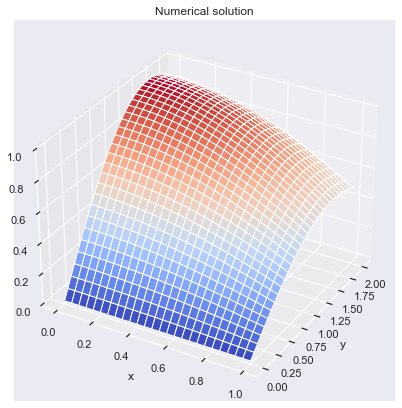

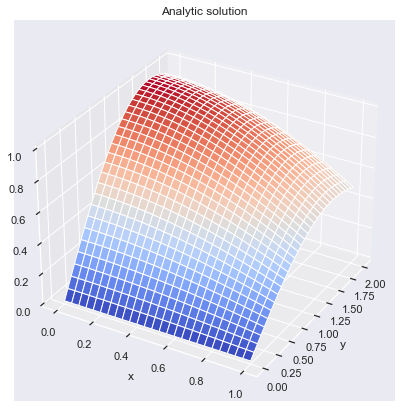

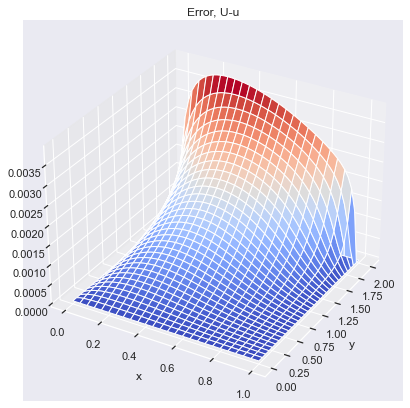

In [116]:
M = 50
x, y, U = anistropic_heat_irrational_r(g2, f2, M, a, np.pi)
u = uex2(x,y)

print(np.linalg.norm(u-U,np.inf))
plot_solution(x, y, U, txt="Numerical solution")
plot_solution(x, y, u, txt="Analytic solution")
plot_solution(x, y, U-u, txt="Error, U-u")

### TASK 2

In [117]:
## HELPING FUNCITONS

def tridiag(u, c, d, N):
    # Help function 
    # Returns a tridiagonal matrix A=tridiag(u, c, d) of dimension N x N.
    e = np.ones(N)        # array [1,1,...,1] of length N
    A = u*np.diag(e[1:],-1)+c*np.diag(e)+d*np.diag(e[1:],1)
    return A


def is_in_domain(x,y):
    # checks if point is inside boundary
    # returns boolean

    # x = x-coordinate in grid
    # y = y-coordinate in grid

    if x <= 1 and x >= 0 and y < 1 - x**2:
        return True
    else: 
        return False

def identity_matrix(M,N):
    # create cropped identity matrix of dimension M x N
    return np.identity(max(M,N))[:M,:N]

def positive_root(xp,yp):
    # find positive root of 3rd degree polynomial
    coeff = [-2,0,1-2*yp,xp]
    r = np.roots(coeff)
    for nums in r:
        if nums.real >= 0:
            r_pos = nums.real
    return r_pos

def internal_rows(x,y):
    # find number of unknowns/internal nodes in grid per row
    num_nodes = []
    for yj in y:
        num_row_nodes = 0
        for xi in x:
            if is_in_domain(xi,yj):
                num_row_nodes += 1
        num_nodes.append(num_row_nodes)
    return num_nodes



def make_A(nodes_in_row):
    # Create A-matrix corresponding to system of equations
    # nodes_in_row = list, where each element contains the amount of internal nodes in that row.
    # nodes_in_row[0] = amount of nodes in first internal row

    # l = number of rows in inner point discretisation
    l = len(nodes_in_row)
    
    # list to hold 2d arrays of rows 
    rows = [0] * l

    # iterate over each row in inner grid, bottom-up
    for i,row_count in enumerate(nodes_in_row):
        current_row = [0] * l

        #initialize diagonal B-matrix
        B = tridiag(-1,4,-1,row_count)

        # we are at the first row
        if i == 0:

            I = identity_matrix(row_count,nodes_in_row[i+1])

            current_row[0] = B
            current_row[1] = -I
            for j in range(2,l):
                current_row[j] = np.zeros((row_count,nodes_in_row[j]))

        # we are at the last row
        elif i == l-1:
            I = identity_matrix(row_count,nodes_in_row[i-1])

            current_row[-1] = B
            current_row[-2] = -I
            for j in range(l-2):
                current_row[j] = np.zeros((row_count,nodes_in_row[j]))

        # we are at the "inbetween" rows; not first and not last
        else:
            I_right =  identity_matrix(row_count,nodes_in_row[i+1])
            I_left =  identity_matrix(row_count,nodes_in_row[i-1])
            current_row[i] = B
            current_row[i+1] = -I_right
            current_row[i-1] = -I_left
            
            for j in range(i-1):
                current_row[j] = np.zeros((row_count,nodes_in_row[j]))
            for j in range(i+2,l):
                current_row[j] = np.zeros((row_count,nodes_in_row[j]))

        #combine the block elements into one "block-row"
        rows[i] = [np.hstack(current_row)]
    
    return np.block([rows])[0]

In [118]:
## MODIFY DISCRETIZATION NEAR BOUNDARY, OR FATTEN BOUNDARY:
def isotropic_heat(g,f,M, fatten = True):
    # M = number of subintervals
    # g = boundary function
    # f = RHS function
    # fatten = boolean:  true = fatten the boundary, false = modify our scheme
    h = 1/M
    
    x = np.linspace(0, 1, M+1)[1:-1]
    y = np.linspace(0, 1, M+1)[1:-1]

    # Create A-matrix
    int_rows = internal_rows(x,y)
    A_h = make_A(int_rows)

    # calculate number of internal nodes inside domain
    num_nodes = sum(int_rows)
    
    # SET BOUNDARY CONDITIONS:

    #array to hold boundary values
    gn = np.zeros(num_nodes)
    
    #array to hold RHS function values
    fn = np.zeros(num_nodes)

    # numeration of internal nodes
    n = 0
    for i in range(1,M): # Iterate over gridpoints in y-direction
        for j in range(1,M): # Iterate over gridpoints in x-direction

            # We only want to look at internal nodes in our domain
            if is_in_domain(j*h,i*h):
                # Given our domain, we know that only north or east point is in risk of being outside boundary,
                # given that our point is within the domain. Thus, we only check this for north and east points

                # set initial values for eta_1 and eta_2
                eta_1 = 1
                eta_2 = 1

                # Left boundary
                if j == 1: 
                    
                    if not is_in_domain((j+1)*h,i*h): #and not fatten:
                        # right point is OUTSIDE boundary , and we must adjust west point coefficient  
                        #xp = j*h
                        #yp = i*h
                        
                        #eta_2 = (np.sqrt(1-yp)-xp)/h

                        if fatten:
                            xE = (j+1)*h 
                            yE = i*h
                            r = positive_root(xE,yE)
                            xq = (r,1-r**2)
                            gn[n] += g(xq[0], xq[1])
                            eta_2 = 1
                        
                        else:
                            # east point is OUTSIDE boundary, and we must adjust west point coefficient
                            xp = j*h
                            yp = i*h
                            eta_1 = (1-xp**2-yp)/h

                            gn[n] += 2/(eta_2*(eta_2 + 1)) * g(h*(j+eta_2), i*h) 
                        
                    else: # right point is INSIDE boundary (or we are fattening the boundary)
                        eta_2 = 1
      
                    gn[n] +=  2/(eta_2 + 1) * g(0, h*i) 

                # Right boundary; only for points not directly to the right of left boundary
                elif not is_in_domain((j+1)*h,i*h): #check if East point outside domain
                    
                    if fatten:
                        # Find projection onto boundary
                        xE = (j+1)*h
                        yE = i*h
                        r = positive_root(xE,yE)
                        xq = (r,1-r**2)
                        gn[n] += g(xq[0], xq[1])

                    else: # We modify our scheme
                        xp = j*h
                        yp = i*h
                        
                        eta_2 = (np.sqrt(1-yp)-xp)/h
                        # change coefficient for east node, which is then added to boundary
                        gn[n] += 2/(eta_2*(eta_2 + 1)) * g(np.sqrt(1-yp), yp)
                        
                        # change coefficient for west node
                        A_h[n,n-1] = -2/(eta_2 + 1)

                # Lower boundary
                if i == 1:
                    if not is_in_domain(j*h,(i+1)*h): 
                        if fatten:
                            xN = j*h 
                            yN = (i+1)*h
                            r = positive_root(xN,yN)
                            xq = (r,1-r**2)
                            gn[n] += g(xq[0], xq[1])
                            eta_1 = 1
                        
                        else:
                            # north point is OUTSIDE boundary, and we must adjust south point coefficient
                            xp = j*h
                            yp = i*h
                            eta_1 = (1-xp**2-yp)/h

                            gn[n] += 2/(eta_1*(eta_1 + 1)) * g(h*j, (i+eta_1)*h) 
                    else:  # north point is INSIDE boundary (or we are fattening the boundary)
                        eta_1 = 1

                    gn[n] +=  2/(eta_1 + 1) * g(h*j, 0) 

                
                # Upper boundary; only for points not directly above lower boundary
                elif not is_in_domain(j*h,(i+1)*h): #check if North point outside domain
                    if fatten: # We fatten the boundary
                
                        # Find projection onto boundary
                        xN = j*h 
                        yN = (i+1)*h
                        r = positive_root(xN,yN)
                        xq = (r,1-r**2)
                        gn[n] += g(xq[0], xq[1])

                    else:  #We modify our scheme
                        xp = j*h
                        yp = i*h
                        
                        eta_1 = (1-xp**2-yp)/h
                        # change coefficient for north node, which is then added to boundary

                        gn[n] += 2/(eta_1*(eta_1 + 1)) * g(xp, 1-xp**2)
                        

                        # change coefficient for south node
                        A_h[n,n-int_rows[i-2]] = -2/(eta_1 + 1)

                

                # modify center point in scheme
                A_h[n,n] = 2 *(eta_2 + eta_1)/(eta_1 * eta_2)

                # set RHS value
                fn[n] = f(j*h, i*h)

                # go to next point
                n += 1


    # solve linear system
    U = np.linalg.solve(A_h, h**2*fn+gn)

    x = np.linspace(0, 1, M+1)
    y = np.linspace(0, 1, M+1)

    #Create sol'n grid and add boundaries 
    grid = np.zeros((M+1,M+1))
    grid[0,:] = g(x, np.zeros_like(y)) # lower boundary
    grid[:,0] = g(np.zeros_like(x),y) # left boundary
    
    # add values for internal nodes to final grid 
    node_index  = 0
    for i in range(1,M+1): #iter over y-coordinates
        for j in range(1,M+1): # iter over x-coord
            if is_in_domain(j*h,i*h):
                grid[i,j] = U[node_index] 
                node_index += 1

    return x,y,grid

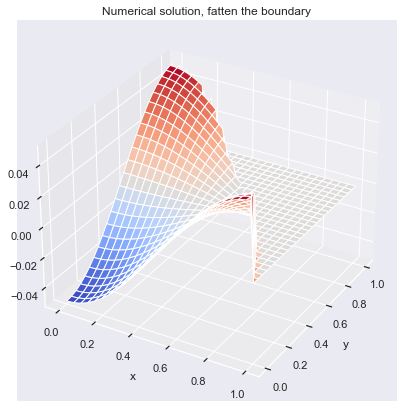

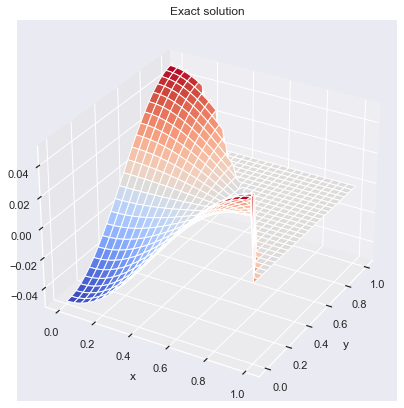

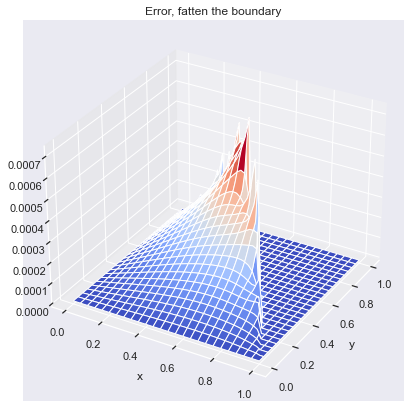

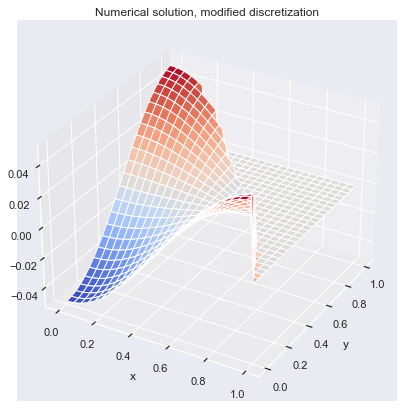

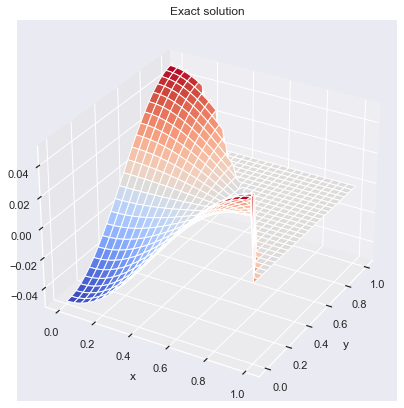

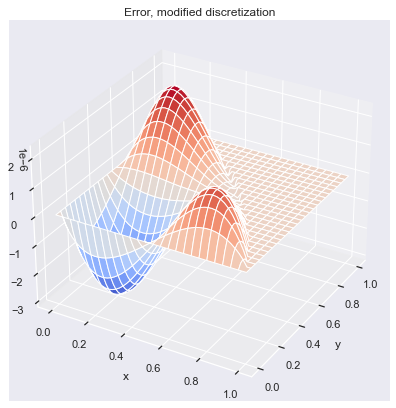

In [119]:
def f1(x,y):
    return -np.cos(np.pi*x) * np.cos(np.pi*y)  

def uex1(x,y):
    xv, yv = np.meshgrid(x,y)
    yv = np.flip(yv,0)
    z = -1/(2*np.pi**2)*np.cos(np.pi*xv)*np.cos(np.pi*yv)
    #set points outside domain to zero
    znew = np.where((1-xv**2 > yv),z,0)
    return np.flipud(znew)

def g(x,y):
    return -1/(2*np.pi**2)*np.cos(np.pi*x)*np.cos(np.pi*y)

M = 50
x, y, U = isotropic_heat(g, f1, M, fatten = True)

#exact sol'n
u = uex1(x,y)
def fix_corners(u,U):
    # Ensure u and U follow same boundary
    U[0,-1] = u[0,-1]
    U[-1,0] = u[-1,0]
    return u,U
def bndry(x):
    return 1-x**2
u, U = fix_corners(u,U)
err_fat = np.abs(U-u)

#plot sol'ns 
plot_solution(x, y, U, txt="Numerical solution, fatten the boundary")
plot_solution(x, y, u, txt="Exact solution")
plot_solution(x,y,err_fat, txt="Error, fatten the boundary")

x, y, U = isotropic_heat(g, f1, M, fatten = False)
u, U = fix_corners(u,U)
err_nofat = U-u

#plot sol'ns 
plot_solution(x, y, U, txt="Numerical solution, modified discretization")
plot_solution(x, y, u, txt="Exact solution")
plot_solution(x,y,err_nofat, txt="Error, modified discretization")

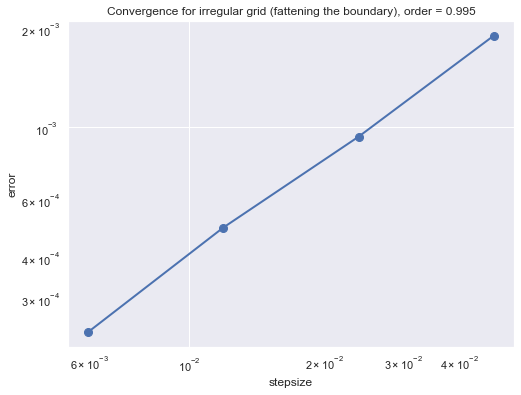

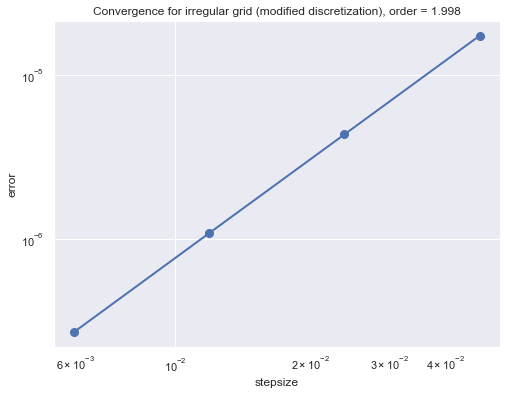

In [120]:
def convergence2(u_exact, rhs, g=g, M0 = 10, K_max = 5, solver=isotropic_heat, fatten = True):
    """
    Calculates errors for different values of M, i.e. different stepsizes.
    Returns array of stepsizes, errors and order of fitted curve in log-log.
    M0: number of intervals for first measurement
    K_max: number of times error will be measured (stepsize halved each time)
    """
    errs = np.zeros(K_max)
    hs = np.zeros(K_max)

    M = M0
    
    for l in range(K_max):
        x, y, U = solver(g,rhs,M,fatten)
        u = u_exact(x,y)
        u, U = fix_corners(u,U)
        hs[l] = 1/M
        errs[l] = np.linalg.norm((U - u_exact(x,y)).flatten(), np.inf)
        
        M *= 2

    order = np.polyfit(np.log(hs),np.log(errs),1)[0]
    return hs, errs, round(order, 3)

M = 21
K = 4
H, E, order = convergence2(uex1, f1, g, M0 = M, K_max = K, solver = isotropic_heat, fatten = True)
plt.figure(figsize=(8,6))
plt.loglog(H, E, 'o-')
plt.title(f"Convergence for irregular grid (fattening the boundary), order = {order}")
plt.xlabel("stepsize")
plt.ylabel("error")
plt.show()

H, E, order = convergence2(uex1, f1, g, M0 = M, K_max = K, solver = isotropic_heat, fatten = False)
plt.figure(figsize=(8,6))
plt.loglog(H, E, 'o-')
plt.title(f"Convergence for irregular grid (modified discretization), order = {order}")
plt.xlabel("stepsize")
plt.ylabel("error")
plt.show()